In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0,1";
import random
random.seed(10)
import pandas as pd
data=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification.csv')
#test=pd.read_csv('/kaggle/input/issue-report-nlp/Issue_Report_Classification-test.csv')

data.head(10)

,Unnamed: 0,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
0,0,https://api.github.com/repos/eamodio/vscode-gi...,bug,2021-01-02T18:07:30Z,NONE,https://api.github.com/repos/eamodio/vscode-gi...,Welcome screen on every editor window is very ...,I just discovered Gitlens and find the functio...
1,1,https://api.github.com/repos/binwiederhier/pco...,bug,2020-12-31T18:19:31Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"""pcopy invite"" and ""pcopy paste abc:"" does not...",NaN
2,2,https://api.github.com/repos/binwiederhier/pco...,bug,2021-01-03T04:33:36Z,OWNER,https://api.github.com/repos/binwiederhier/pcopy,"UI: Modal overlay is half transparent, shouldn...",NaN
3,3,https://api.github.com/repos/Sothatsit/RoyalUr...,enhancement,2020-12-25T00:46:00Z,OWNER,https://api.github.com/repos/Sothatsit/RoyalUr...,Make the loading screen scale with browser win...,Currently the loading wheel is a fixed size in...
4,4,https://api.github.com/repos/Malivil/TTT-Custo...,bug,2021-01-02T21:36:57Z,OWNER,https://api.github.com/repos/Malivil/TTT-Custo...,Spectator - Investigate a way to strip weapons...,To bring magneto stick floating
5,5,https://api.github.com/repos/jankuss/shroom/is...,enhancement,2020-12-31T13:43:33Z,NONE,https://api.github.com/repos/jankuss/shroom,Single Shroom instance for multiple canvases?,Is it possible to be able to create a single S...
6,7,https://api.github.com/repos/juniorGreg/moisi_...,bug,2020-12-27T01:40:34Z,OWNER,https://api.github.com/repos/juniorGreg/moisi_...,Correct navigation bar for some resolution,![Capture d’écran_2020-12-26_20-40-02](https:/...
7,8,https://api.github.com/repos/JoeParrinello/Bro...,enhancement,2021-01-02T16:05:43Z,OWNER,https://api.github.com/repos/JoeParrinello/Bro...,Return asset growth,Would have to cache:\r\n- Stock Ticker Request...
8,9,https://api.github.com/repos/Forty-Bot/trends....,enhancement,2021-01-03T03:46:34Z,OWNER,https://api.github.com/repos/Forty-Bot/trends.tf,Add filter for logs,Add the ability to filter logs like on other p...
9,10,https://api.github.com/repos/andrewjj20/post/i...,enhancement,2020-10-23T04:38:35Z,COLLABORATOR,https://api.github.com/repos/andrewjj20/post,Create trait for Meetup Service publisher stores,Developers could want different backing publis...


> Print the length of the dataset

In [2]:
data=data.sample(frac=0.45)
len(data)

325305

In [3]:
data=data[['issue_body', 'issue_label']]

In [4]:
data.head()

,issue_body,issue_label
239841,Hi and thank you for your hard work!\r\n\r\nA ...,enhancement
273035,center response container and offset the breat...,enhancement
414041,When using `IntrinsicContentTrackSize`s the in...,bug
530196,Hi!\r\n\r\nWhen running the plugin on a `.h` f...,enhancement
640792,Working on highlighting line swaps to show alg...,enhancement


> Drop nulls

In [5]:
data = data.dropna(subset=['issue_body'])

In [6]:
len(data)

292878

> Standardize the text

In [7]:
import re

def standardize_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s\']', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\s+' ,'',text)
    text = text.lower()
    return text.strip()

data['issue_body'] = data['issue_body'].apply(standardize_text)

data = data.drop_duplicates(subset=['issue_body'])

In [8]:
len(data)

278330

> Remove punctuation

In [9]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['issue_body'] = data['issue_body'].apply(remove_punctuation)

In [10]:
possible_labels = data.issue_label.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'enhancement': 0, 'bug': 1, 'question': 2}

In [11]:
data['issue_label'] = data.issue_label.replace(label_dict)

/tmp/ipykernel_24/3275910327.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['issue_label'] = data.issue_label.replace(label_dict)


In [12]:
data.head(10)

,issue_body,issue_label
239841,hi and thank you for your hard work a feature ...,0
273035,center response container and offset the breat...,0
414041,when using intrinsiccontenttracksizes the intr...,1
530196,hi when running the plugin on a h file some no...,0
640792,working on highlighting line swaps to show alg...,0
412751,lines ending with are not being handled correc...,1
673679,if a user stays unauthenticated for example on...,1
95990,requirements add two status task lists add but...,0
516154,i want to open a crop view using crop data tha...,1
55802,which is because of this httpsgithubcomahoylem...,1


In [13]:
# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# def clean_tokenization(text):
#   return word_tokenize(text)

# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words=set(stopwords.words('english'))
# def clean_stopwords(token):
#    return [item for item in token if item not in stop_words]

# data['issue_body'] = data['issue_body'].apply(clean_tokenization)
# data['issue_body']=data['issue_body'].apply(clean_stopwords)


In [14]:
# import nltk
# nltk.download('punkt')

In [15]:
# import re
# import nltk
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer

In [16]:
# def convert_to_string(listReview):
#   return' '.join(listReview)
# data['issue_body']=data['issue_body'].apply(convert_to_string)

In [17]:
from imblearn.under_sampling import RandomUnderSampler

min_samples = data['issue_label'].value_counts().min()

# Resample each class to have the same number of samples (minimum number)
rus = RandomUnderSampler(sampling_strategy={class_label: min_samples for class_label in data['issue_label'].unique()})
X, y = rus.fit_resample(data.drop(columns='issue_label'), data['issue_label'])

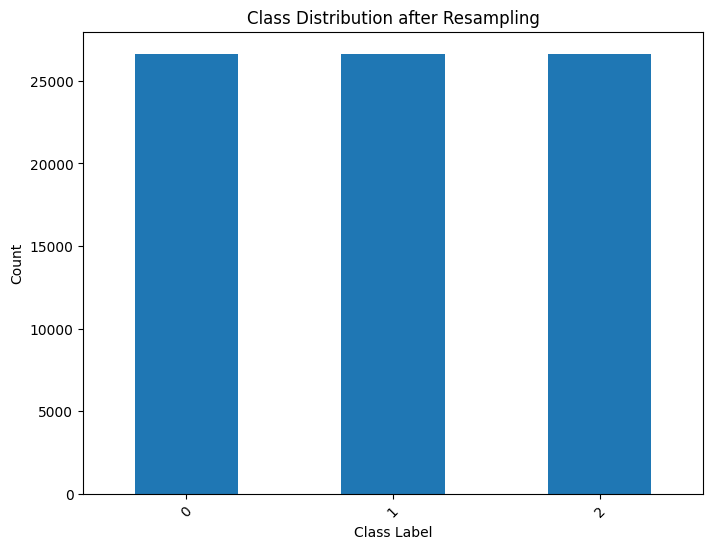

In [18]:
import matplotlib.pyplot as plt

# Get value counts of the resampled labels
label_counts = pd.Series(y).value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Class Distribution after Resampling')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
len(X), len(y)

(79983, 79983)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(x_train), len(x_test)

(63986, 15997)

In [21]:
# for plotting comparisons
acc = []; pre = [] ; rec = [] ; f = []

In [22]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import sklearn.metrics as metrics

In [23]:
# Install ktrain
!pip install --upgrade pip -q
!pip install -q ktrain
!pip install tf-keras==2.15
!pip install transformers datasets torch tensorboard
import os 
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import ktrain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [24]:
# from ktrain import text

In [25]:
class_names=['enhancement', 'bug','question']
x_train = x_train['issue_body'].tolist()
y_train = y_train.to_numpy()
x_test = x_test['issue_body'].tolist()
y_test = y_test.to_numpy()


In [26]:
# (x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train,
#                                                                       y_train=y_train,
#                                                                       x_test=x_test,
#                                                                       y_test=y_test,
#                                                                       class_names=class_names,
#                                                                       preprocess_mode='bert',maxlen=80)

In [27]:
# # Step 3: Load the pre-trained BERT model
# model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)

# # Step 4: Initialize a ktrain classifier using BERT
# learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test))

# # Step 5: Train the classifier on your data
# learner.fit_onecycle(2e-5, 1)

# # Step 6: Evaluate the classifier on a validation set
# learner.validate(val_data=(x_test, y_test))


In [28]:
# # It may need long time but ensures healthy training
# learner.lr_find(show_plot=True, max_epochs=2)

In [29]:
# # After the learning rate find process plot the curve of leaning rate - loss to select best learning rate
# learner.lr_plot()

In [30]:
# # Fit the leraner to the data for 2 epochs
# # Many other fit options available on the documentation of ktrain https://github.com/amaiya/ktrain
# learner.autofit(2e-5, 2)
# learner.validate(val_data=(x_test, y_test))

In [31]:
#predictor = ktrain.get_predictor(learner.model)
#predictor.save('/content/drive/MyDrive/NLP/my_predictor')

In [32]:
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Tokenize the training data
train_encodings = tokenizer(x_train, truncation=True, padding=True)

# Tokenize the testing data
test_encodings = tokenizer(x_test, truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [33]:
import torch

# Convert labels to tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)


In [34]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset objects
train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)


In [35]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load the model
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    report_to='tensorboard'
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train the model
trainer.train()


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 1.1364, 'grad_norm': 3.758880138397217, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.005}
{'loss': 1.0775, 'grad_norm': 3.4862754344940186, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.01}
{'loss': 1.0714, 'grad_norm': 3.359842538833618, 'learning_rate': 3e-06, 'epoch': 0.015}
{'loss': 1.0386, 'grad_norm': 3.157850742340088, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.02}
{'loss': 0.9984, 'grad_norm': 2.4262475967407227, 'learning_rate': 5e-06, 'epoch': 0.025}
{'loss': 1.0026, 'grad_norm': 3.0371365547180176, 'learning_rate': 6e-06, 'epoch': 0.03}
{'loss': 1.0038, 'grad_norm': 2.587085723876953, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.035}
{'loss': 0.9694, 'grad_norm': 2.4202568531036377, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.04}
{'loss': 1.0076, 'grad_norm': 2.4368114471435547, 'learning_rate': 9e-06, 'epoch': 0.045}
{'loss': 0.9877, 'grad_norm': 2.816020965576172, 'learning_rate': 1e-05, 'epoch': 0.05}
{'loss': 0.9825, 'grad_norm'

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.7416, 'grad_norm': 5.005587100982666, 'learning_rate': 4.990909090909091e-05, 'epoch': 0.255}
{'loss': 0.7255, 'grad_norm': 3.1421079635620117, 'learning_rate': 4.981818181818182e-05, 'epoch': 0.26}
{'loss': 0.7106, 'grad_norm': 3.2110424041748047, 'learning_rate': 4.9727272727272725e-05, 'epoch': 0.265}
{'loss': 0.6791, 'grad_norm': 5.117677688598633, 'learning_rate': 4.963636363636364e-05, 'epoch': 0.27}
{'loss': 0.7214, 'grad_norm': 3.179563522338867, 'learning_rate': 4.9545454545454553e-05, 'epoch': 0.275}
{'loss': 0.7438, 'grad_norm': 3.327956438064575, 'learning_rate': 4.945454545454546e-05, 'epoch': 0.28}
{'loss': 0.783, 'grad_norm': 3.0726826190948486, 'learning_rate': 4.936363636363637e-05, 'epoch': 0.285}
{'loss': 0.7464, 'grad_norm': 3.506434440612793, 'learning_rate': 4.9272727272727276e-05, 'epoch': 0.29}
{'loss': 0.6984, 'grad_norm': 3.2966737747192383, 'learning_rate': 4.9181818181818183e-05, 'epoch': 0.295}
{'loss': 0.6058, 'grad_norm': 4.3087687492370605, 'l

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.8146, 'grad_norm': 2.6295347213745117, 'learning_rate': 4.5363636363636366e-05, 'epoch': 0.505}
{'loss': 0.722, 'grad_norm': 3.2212975025177, 'learning_rate': 4.5272727272727274e-05, 'epoch': 0.51}
{'loss': 0.7423, 'grad_norm': 3.295344829559326, 'learning_rate': 4.518181818181819e-05, 'epoch': 0.515}
{'loss': 0.7977, 'grad_norm': 3.902585744857788, 'learning_rate': 4.5090909090909095e-05, 'epoch': 0.52}
{'loss': 0.6859, 'grad_norm': 3.3242218494415283, 'learning_rate': 4.5e-05, 'epoch': 0.525}
{'loss': 0.6959, 'grad_norm': 3.4856340885162354, 'learning_rate': 4.490909090909091e-05, 'epoch': 0.53}
{'loss': 0.6531, 'grad_norm': 3.670570135116577, 'learning_rate': 4.481818181818182e-05, 'epoch': 0.535}
{'loss': 0.6974, 'grad_norm': 2.735865354537964, 'learning_rate': 4.472727272727273e-05, 'epoch': 0.54}
{'loss': 0.7014, 'grad_norm': 3.727978467941284, 'learning_rate': 4.463636363636364e-05, 'epoch': 0.545}
{'loss': 0.7088, 'grad_norm': 2.335902452468872, 'learning_rate': 4.45

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.6378, 'grad_norm': 3.763050079345703, 'learning_rate': 4.081818181818182e-05, 'epoch': 0.755}
{'loss': 0.6686, 'grad_norm': 3.5921289920806885, 'learning_rate': 4.072727272727273e-05, 'epoch': 0.76}
{'loss': 0.6782, 'grad_norm': 2.8358209133148193, 'learning_rate': 4.063636363636364e-05, 'epoch': 0.765}
{'loss': 0.6541, 'grad_norm': 3.2399203777313232, 'learning_rate': 4.0545454545454545e-05, 'epoch': 0.77}
{'loss': 0.6735, 'grad_norm': 2.6685612201690674, 'learning_rate': 4.045454545454546e-05, 'epoch': 0.775}
{'loss': 0.692, 'grad_norm': 1.9307767152786255, 'learning_rate': 4.0363636363636367e-05, 'epoch': 0.78}
{'loss': 0.7191, 'grad_norm': 3.2165353298187256, 'learning_rate': 4.0272727272727274e-05, 'epoch': 0.785}
{'loss': 0.6804, 'grad_norm': 1.92519211769104, 'learning_rate': 4.018181818181818e-05, 'epoch': 0.79}
{'loss': 0.6357, 'grad_norm': 2.9097135066986084, 'learning_rate': 4.009090909090909e-05, 'epoch': 0.795}
{'loss': 0.6528, 'grad_norm': 2.2297732830047607, '

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.6093, 'grad_norm': 3.0890657901763916, 'learning_rate': 3.627272727272727e-05, 'epoch': 1.005}
{'loss': 0.63, 'grad_norm': 2.834094524383545, 'learning_rate': 3.6181818181818186e-05, 'epoch': 1.01}
{'loss': 0.6021, 'grad_norm': 1.931300401687622, 'learning_rate': 3.6090909090909093e-05, 'epoch': 1.015}
{'loss': 0.5669, 'grad_norm': 5.736614227294922, 'learning_rate': 3.6e-05, 'epoch': 1.02}
{'loss': 0.5686, 'grad_norm': 2.491738796234131, 'learning_rate': 3.590909090909091e-05, 'epoch': 1.025}
{'loss': 0.4909, 'grad_norm': 2.878411054611206, 'learning_rate': 3.5818181818181816e-05, 'epoch': 1.03}
{'loss': 0.609, 'grad_norm': 4.371039390563965, 'learning_rate': 3.572727272727273e-05, 'epoch': 1.035}
{'loss': 0.6033, 'grad_norm': 4.45429801940918, 'learning_rate': 3.563636363636364e-05, 'epoch': 1.04}
{'loss': 0.548, 'grad_norm': 4.08664608001709, 'learning_rate': 3.5545454545454545e-05, 'epoch': 1.045}
{'loss': 0.5952, 'grad_norm': 4.88184118270874, 'learning_rate': 3.5454545

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.6283, 'grad_norm': 3.5760722160339355, 'learning_rate': 3.172727272727273e-05, 'epoch': 1.255}
{'loss': 0.5539, 'grad_norm': 2.957050323486328, 'learning_rate': 3.1636363636363635e-05, 'epoch': 1.26}
{'loss': 0.5816, 'grad_norm': 4.526149272918701, 'learning_rate': 3.154545454545454e-05, 'epoch': 1.2650000000000001}
{'loss': 0.5169, 'grad_norm': 6.849870204925537, 'learning_rate': 3.145454545454546e-05, 'epoch': 1.27}
{'loss': 0.5686, 'grad_norm': 5.0084357261657715, 'learning_rate': 3.1363636363636365e-05, 'epoch': 1.275}
{'loss': 0.5143, 'grad_norm': 4.839953899383545, 'learning_rate': 3.127272727272728e-05, 'epoch': 1.28}
{'loss': 0.5181, 'grad_norm': 5.5893754959106445, 'learning_rate': 3.1181818181818186e-05, 'epoch': 1.285}
{'loss': 0.6083, 'grad_norm': 4.210770130157471, 'learning_rate': 3.1090909090909094e-05, 'epoch': 1.29}
{'loss': 0.5733, 'grad_norm': 4.5260725021362305, 'learning_rate': 3.1e-05, 'epoch': 1.295}
{'loss': 0.5682, 'grad_norm': 3.778881788253784, 'le

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.5677, 'grad_norm': 5.433223724365234, 'learning_rate': 2.718181818181818e-05, 'epoch': 1.505}
{'loss': 0.5623, 'grad_norm': 3.6682844161987305, 'learning_rate': 2.7090909090909095e-05, 'epoch': 1.51}
{'loss': 0.5948, 'grad_norm': 4.843616485595703, 'learning_rate': 2.7000000000000002e-05, 'epoch': 1.5150000000000001}
{'loss': 0.5893, 'grad_norm': 4.786830425262451, 'learning_rate': 2.6909090909090913e-05, 'epoch': 1.52}
{'loss': 0.5959, 'grad_norm': 3.2966742515563965, 'learning_rate': 2.681818181818182e-05, 'epoch': 1.525}
{'loss': 0.5749, 'grad_norm': 5.674729824066162, 'learning_rate': 2.6727272727272728e-05, 'epoch': 1.53}
{'loss': 0.5238, 'grad_norm': 4.947834491729736, 'learning_rate': 2.6636363636363636e-05, 'epoch': 1.5350000000000001}
{'loss': 0.5531, 'grad_norm': 4.186124801635742, 'learning_rate': 2.6545454545454547e-05, 'epoch': 1.54}
{'loss': 0.5497, 'grad_norm': 4.999716758728027, 'learning_rate': 2.6454545454545454e-05, 'epoch': 1.545}
{'loss': 0.5648, 'grad_n

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4877, 'grad_norm': 2.9319920539855957, 'learning_rate': 2.2636363636363637e-05, 'epoch': 1.755}
{'loss': 0.5483, 'grad_norm': 5.343785285949707, 'learning_rate': 2.2545454545454548e-05, 'epoch': 1.76}
{'loss': 0.5639, 'grad_norm': 6.00172758102417, 'learning_rate': 2.2454545454545455e-05, 'epoch': 1.7650000000000001}
{'loss': 0.5567, 'grad_norm': 5.14296293258667, 'learning_rate': 2.2363636363636366e-05, 'epoch': 1.77}
{'loss': 0.4885, 'grad_norm': 3.579904317855835, 'learning_rate': 2.2272727272727274e-05, 'epoch': 1.775}
{'loss': 0.5161, 'grad_norm': 4.281862258911133, 'learning_rate': 2.2181818181818184e-05, 'epoch': 1.78}
{'loss': 0.5751, 'grad_norm': 4.107163906097412, 'learning_rate': 2.2090909090909092e-05, 'epoch': 1.7850000000000001}
{'loss': 0.5627, 'grad_norm': 4.58070182800293, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.79}
{'loss': 0.5446, 'grad_norm': 4.509089469909668, 'learning_rate': 2.190909090909091e-05, 'epoch': 1.795}
{'loss': 0.5433, 'grad_norm

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4294, 'grad_norm': 3.906303644180298, 'learning_rate': 1.8090909090909093e-05, 'epoch': 2.005}
{'loss': 0.4897, 'grad_norm': 3.609600305557251, 'learning_rate': 1.8e-05, 'epoch': 2.01}
{'loss': 0.3695, 'grad_norm': 2.929161310195923, 'learning_rate': 1.7909090909090908e-05, 'epoch': 2.015}
{'loss': 0.4092, 'grad_norm': 3.419069528579712, 'learning_rate': 1.781818181818182e-05, 'epoch': 2.02}
{'loss': 0.5088, 'grad_norm': 4.538506984710693, 'learning_rate': 1.772727272727273e-05, 'epoch': 2.025}
{'loss': 0.3754, 'grad_norm': 3.636983871459961, 'learning_rate': 1.7636363636363637e-05, 'epoch': 2.03}
{'loss': 0.4011, 'grad_norm': 4.628556728363037, 'learning_rate': 1.7545454545454545e-05, 'epoch': 2.035}
{'loss': 0.4823, 'grad_norm': 6.028903484344482, 'learning_rate': 1.7454545454545456e-05, 'epoch': 2.04}
{'loss': 0.4631, 'grad_norm': 3.9975502490997314, 'learning_rate': 1.7363636363636366e-05, 'epoch': 2.045}
{'loss': 0.432, 'grad_norm': 3.803290843963623, 'learning_rate': 1

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.446, 'grad_norm': 9.737386703491211, 'learning_rate': 1.3545454545454547e-05, 'epoch': 2.255}
{'loss': 0.4572, 'grad_norm': 6.099736213684082, 'learning_rate': 1.3454545454545457e-05, 'epoch': 2.26}
{'loss': 0.4102, 'grad_norm': 4.130622863769531, 'learning_rate': 1.3363636363636364e-05, 'epoch': 2.265}
{'loss': 0.4102, 'grad_norm': 3.6781747341156006, 'learning_rate': 1.3272727272727273e-05, 'epoch': 2.27}
{'loss': 0.4313, 'grad_norm': 5.909125328063965, 'learning_rate': 1.318181818181818e-05, 'epoch': 2.275}
{'loss': 0.3887, 'grad_norm': 7.625266075134277, 'learning_rate': 1.3090909090909093e-05, 'epoch': 2.2800000000000002}
{'loss': 0.4171, 'grad_norm': 5.732468605041504, 'learning_rate': 1.3000000000000001e-05, 'epoch': 2.285}
{'loss': 0.3547, 'grad_norm': 4.341403961181641, 'learning_rate': 1.290909090909091e-05, 'epoch': 2.29}
{'loss': 0.4375, 'grad_norm': 6.7761383056640625, 'learning_rate': 1.2818181818181818e-05, 'epoch': 2.295}
{'loss': 0.426, 'grad_norm': 3.968471

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4314, 'grad_norm': 3.5238165855407715, 'learning_rate': 9e-06, 'epoch': 2.505}
{'loss': 0.418, 'grad_norm': 4.705780982971191, 'learning_rate': 8.90909090909091e-06, 'epoch': 2.51}
{'loss': 0.4018, 'grad_norm': 6.833808422088623, 'learning_rate': 8.818181818181819e-06, 'epoch': 2.515}
{'loss': 0.4677, 'grad_norm': 6.989421367645264, 'learning_rate': 8.727272727272728e-06, 'epoch': 2.52}
{'loss': 0.3277, 'grad_norm': 3.702639579772949, 'learning_rate': 8.636363636363637e-06, 'epoch': 2.525}
{'loss': 0.435, 'grad_norm': 7.277471542358398, 'learning_rate': 8.545454545454546e-06, 'epoch': 2.5300000000000002}
{'loss': 0.4348, 'grad_norm': 7.809335708618164, 'learning_rate': 8.454545454545455e-06, 'epoch': 2.535}
{'loss': 0.4175, 'grad_norm': 7.231910705566406, 'learning_rate': 8.363636363636365e-06, 'epoch': 2.54}
{'loss': 0.3499, 'grad_norm': 7.128756523132324, 'learning_rate': 8.272727272727274e-06, 'epoch': 2.545}
{'loss': 0.3829, 'grad_norm': 5.249251365661621, 'learning_rate

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'loss': 0.4678, 'grad_norm': 7.892765045166016, 'learning_rate': 4.454545454545455e-06, 'epoch': 2.755}
{'loss': 0.4115, 'grad_norm': 7.140692710876465, 'learning_rate': 4.363636363636364e-06, 'epoch': 2.76}
{'loss': 0.4538, 'grad_norm': 8.742403984069824, 'learning_rate': 4.272727272727273e-06, 'epoch': 2.765}
{'loss': 0.4494, 'grad_norm': 5.742396354675293, 'learning_rate': 4.181818181818182e-06, 'epoch': 2.77}
{'loss': 0.4007, 'grad_norm': 6.7076520919799805, 'learning_rate': 4.0909090909090915e-06, 'epoch': 2.775}
{'loss': 0.3827, 'grad_norm': 4.584375381469727, 'learning_rate': 4.000000000000001e-06, 'epoch': 2.7800000000000002}
{'loss': 0.42, 'grad_norm': 8.343483924865723, 'learning_rate': 3.90909090909091e-06, 'epoch': 2.785}
{'loss': 0.5139, 'grad_norm': 7.709445476531982, 'learning_rate': 3.818181818181819e-06, 'epoch': 2.79}
{'loss': 0.426, 'grad_norm': 4.550464153289795, 'learning_rate': 3.727272727272727e-06, 'epoch': 2.795}
{'loss': 0.5278, 'grad_norm': 7.179966926574707

TrainOutput(global_step=6000, training_loss=0.5729010728995005, metrics={'train_runtime': 5269.4624, 'train_samples_per_second': 36.428, 'train_steps_per_second': 1.139, 'train_loss': 0.5729010728995005, 'epoch': 3.0})

In [36]:
# Evaluate the model
eval_results = trainer.evaluate()

print(eval_results)


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.7037246227264404, 'eval_runtime': 147.5325, 'eval_samples_per_second': 108.43, 'eval_steps_per_second': 0.847, 'epoch': 3.0}
{'eval_loss': 0.7037246227264404, 'eval_runtime': 147.5325, 'eval_samples_per_second': 108.43, 'eval_steps_per_second': 0.847, 'epoch': 3.0}


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Classification Report:
              precision    recall  f1-score   support

 enhancement       0.77      0.74      0.75      5292
         bug       0.72      0.75      0.73      5371
    question       0.72      0.73      0.72      5334

    accuracy                           0.74     15997
   macro avg       0.74      0.74      0.74     15997
weighted avg       0.74      0.74      0.74     15997



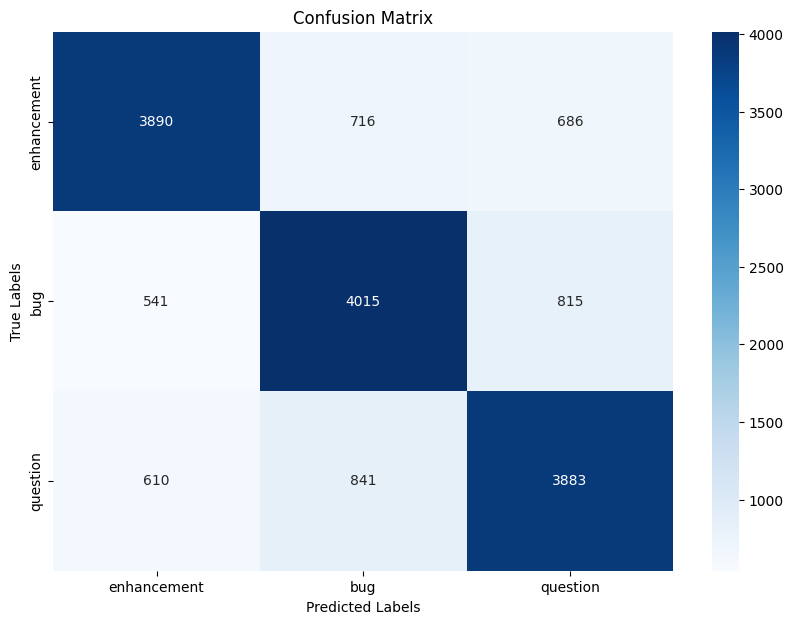

In [37]:
from transformers import Trainer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

# Assuming you have a trained `trainer` object and `test_dataset`

# 1. Get predictions from the model
predictions = trainer.predict(test_dataset)

# 2. Extract logits and convert to predicted labels
logits = predictions.predictions
predicted_labels = np.argmax(logits, axis=1)

# 3. Get true labels from the dataset
true_labels = test_dataset.labels

# Convert tensors to numpy arrays if necessary
if isinstance(true_labels, torch.Tensor):
    true_labels = true_labels.numpy()

# 4. Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# 5. Print the classification report
target_names = ['enhancement', 'bug','question']
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print("Classification Report:")
print(report)

# 6. Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
